In [ ]:
import joblib

X_train_scaled = joblib.load("../data/processed/X_train_scaled.joblib")
X_test_scaled = joblib.load("../data/processed/X_test_scaled.joblib")
y_train = joblib.load("../data/processed/y_train.joblib")
y_test = joblib.load("../data/processed/y_test.joblib")

In [15]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 0.5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 0.1),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 3),

    }
    
    model = XGBClassifier(**param, eval_metric="logloss", random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best params:", study.best_params)
print("Best CV accuracy:", study.best_value)

best_model = XGBClassifier(**study.best_params)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[I 2025-07-17 12:34:21,202] A new study created in memory with name: no-name-eefc086e-88aa-4257-9bd5-4cefa109142f
[I 2025-07-17 12:34:22,455] Trial 9 finished with value: 0.9892784894507199 and parameters: {'n_estimators': 73, 'max_depth': 3, 'learning_rate': 0.07466875975157987, 'subsample': 0.8882715818916127, 'colsample_bytree': 0.7476663939948771, 'gamma': 0.03658778676300112, 'reg_alpha': 0.09892970049966889, 'reg_lambda': 1.9137516040885236}. Best is trial 9 with value: 0.9892784894507199.
[I 2025-07-17 12:34:23,127] Trial 7 finished with value: 0.9917059739934935 and parameters: {'n_estimators': 124, 'max_depth': 3, 'learning_rate': 0.22076895064376892, 'subsample': 0.9379036035861499, 'colsample_bytree': 0.6480537186111498, 'gamma': 0.48317480246890576, 'reg_alpha': 0.04290377490262079, 'reg_lambda': 1.6831014767620252}. Best is trial 7 with value: 0.9917059739934935.
[I 2025-07-17 12:34:23,376] Trial 10 finished with value: 0.9894133466720177 and parameters: {'n_estimators': 1

Best params: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.24721322856934358, 'subsample': 0.823130190908469, 'colsample_bytree': 0.9165702272819175, 'gamma': 0.11760547742064624, 'reg_alpha': 0.08876803651008969, 'reg_lambda': 2.0479631749918714}
Best CV accuracy: 0.9927174645325644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2957
           1       0.98      0.98      0.98       751

    accuracy                           0.99      3708
   macro avg       0.99      0.99      0.99      3708
weighted avg       0.99      0.99      0.99      3708



In [16]:
from sklearn.ensemble import RandomForestClassifier

def rf_objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }
    
    model = RandomForestClassifier(**param, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy").mean()
    return score

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(rf_objective, n_trials=50, n_jobs=-1)

print("Best RF params:", study_rf.best_params)
print("Best RF CV accuracy:", study_rf.best_value)

best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

y_pred_rf = best_rf.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

[I 2025-07-17 12:34:45,619] A new study created in memory with name: no-name-f39e1457-3a18-4805-83dc-f52cf1648f72
[I 2025-07-17 12:34:49,705] Trial 11 finished with value: 0.9914362322711926 and parameters: {'n_estimators': 58, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 11 with value: 0.9914362322711926.
[I 2025-07-17 12:34:49,966] Trial 0 finished with value: 0.989008747728419 and parameters: {'n_estimators': 68, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10, 'bootstrap': True}. Best is trial 11 with value: 0.9914362322711926.
[I 2025-07-17 12:34:50,640] Trial 9 finished with value: 0.9925151446009863 and parameters: {'n_estimators': 70, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 9 with value: 0.9925151446009863.
[I 2025-07-17 12:34:51,294] Trial 8 finished with value: 0.9915711167721954 and parameters: {'n_estimators': 81, 'max_depth': 10, 'min_samples_split':

Best RF params: {'n_estimators': 246, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}
Best RF CV accuracy: 0.992717450892712
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2957
           1       0.98      0.99      0.98       751

    accuracy                           0.99      3708
   macro avg       0.99      0.99      0.99      3708
weighted avg       0.99      0.99      0.99      3708



In [ ]:
import os

joblib.dump(best_model, "../models/best_xgb_model.joblib")
xgb_size = os.path.getsize("../models/best_xgb_model.joblib") / 1024  # in KB

joblib.dump(best_rf, "../models/best_rf_model.joblib")
rf_size = os.path.getsize("../models/best_rf_model.joblib") / 1024  # in KB

print(f"XGB model size: {xgb_size:.2f} KB")
print(f"Random Forest model size: {rf_size:.2f} KB")

XGB model size: 360.75 KB
Random Forest model size: 3916.77 KB


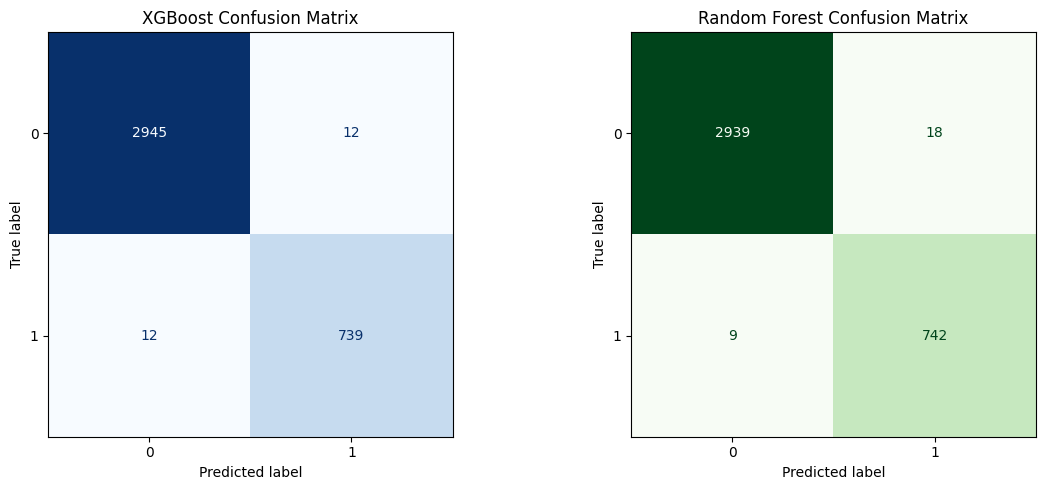

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_xgb = best_model.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_model.classes_)
disp_xgb.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("XGBoost Confusion Matrix")

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

XGBoost is smaller and a bit better due to it's boosting strategy. Let's inspect it further.

Feature importance

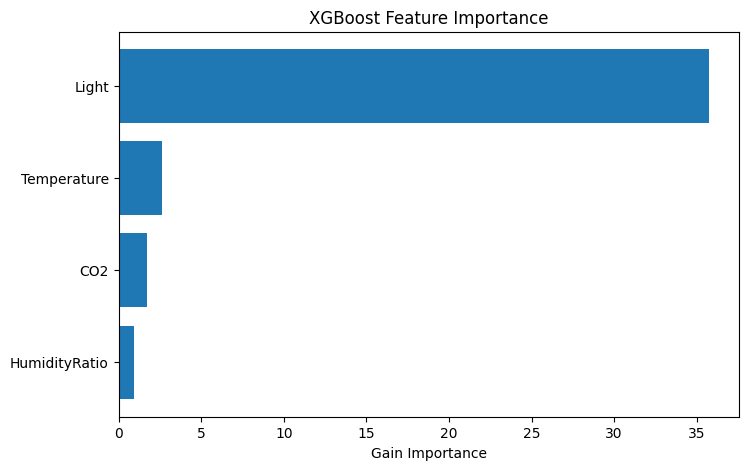

In [19]:
import pandas as pd

feature_names = ["Temperature", "Light", "CO2", "HumidityRatio"]

importance_dict = best_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    "Feature": [feature_names[int(k[1:])] for k in importance_dict.keys()],
    "Importance": list(importance_dict.values())
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Gain Importance")
plt.title("XGBoost Feature Importance")
plt.show()